In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn import preprocessing

In [8]:
cebuano_dataset = pd.read_csv('/content/drive/MyDrive/Cebuano Dataset/v2/Cebuano_TRAD_Features_v2.csv')

In [9]:
print('Shape of Features', cebuano_dataset.shape)
cebuano_dataset.head(5)

Shape of Features (284, 9)


,book_title,unique_words,word_count,sentence_count,average_word_len,average_sentence_len,average_syllable_count,polysyll_count,label
0,1 Ang mga Prutas Gisuwat ni: Elvira J. Buot ...,31,56,9,4.446429,6.222222,1.875000,0,1
1,1 Ang Monyeka Gisuwat ni: Milagros Meca ...,37,56,10,5.178571,5.600000,2.357143,1,1
2,1 Ang Ok-ok Gisuwat ni: Juna J. Presbite...,29,35,7,4.342857,5.000000,1.914286,0,1
3,1 Ang Panimalay Gisuwat ni: Cecilia Y. W...,50,65,17,5.769231,3.823529,2.476923,3,1
4,1 Ang Pati ni Pipo Sinulat nila ni: Rosemarie ...,62,105,17,4.238095,6.176471,1.876190,1,1


In [10]:
c = cebuano_dataset['label']
X = cebuano_dataset.drop('label', axis=1)
X = X.drop('book_title', axis=1)

X.head()

,unique_words,word_count,sentence_count,average_word_len,average_sentence_len,average_syllable_count,polysyll_count
0,31,56,9,4.446429,6.222222,1.875000,0
1,37,56,10,5.178571,5.600000,2.357143,1
2,29,35,7,4.342857,5.000000,1.914286,0
3,50,65,17,5.769231,3.823529,2.476923,3
4,62,105,17,4.238095,6.176471,1.876190,1


## Training and Testing Sets

In [11]:
from sklearn.model_selection import train_test_split
X = cebuano_dataset[['unique_words','word_count','sentence_count','average_word_len','average_sentence_len','average_syllable_count','polysyll_count']]
y = cebuano_dataset[['label']]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [13]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100,max_features='auto',max_depth=20)
clf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(max_depth=20)

In [14]:
y_pred=clf.predict(X_test)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred, digits=3))

[[22  2  1]
 [ 2 12  2]
 [ 0  0 16]]
              precision    recall  f1-score   support

           1      0.917     0.880     0.898        25
           2      0.857     0.750     0.800        16
           3      0.842     1.000     0.914        16

    accuracy                          0.877        57
   macro avg      0.872     0.877     0.871        57
weighted avg      0.879     0.877     0.875        57



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


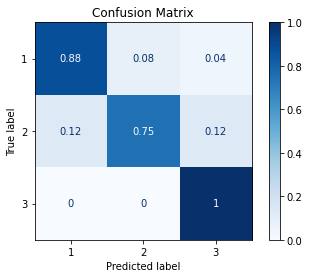

In [16]:
from sklearn.metrics import plot_confusion_matrix
matrix = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
# plt.title('Confusion Matrix')
# plt.show(matrix)
# plt.show()

plt.tight_layout()
plt.savefig("Matrix_TRAD_RF_120.pdf", dpi=120, format='pdf')

## Random Forest Hyperparmeter Tuning using GridSearchCV

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

rfc_model= RandomForestClassifier()

parameters = {'n_estimators': [10,100,1000], 
              'max_features': [6,32,'auto'], 
              'max_depth': [10,20,40],
              'criterion' :['gini', 'entropy']
             }

grid_search = GridSearchCV(RandomForestClassifier(), parameters, scoring= 'accuracy', refit = 'True', cv = 5)
grid_search = grid_search.fit(X_train, y_train)

print("Best parameters:")
print(grid_search.best_params_)
rfc_best_params_= grid_search.best_params_

rfc_model.set_params(**grid_search.best_params_)
rfc_model.fit(X_train, y_train)

predictions = rfc_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

Best parameters:
{'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'n_estimators': 1000}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [18]:
grid_search = grid_search.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, grid_search, digits=3))

[[22  2  1]
 [ 2 12  2]
 [ 0  0 16]]
              precision    recall  f1-score   support

           1      0.958     0.920     0.939        25
           2      0.867     0.812     0.839        16
           3      0.833     0.938     0.882        16

    accuracy                          0.895        57
   macro avg      0.886     0.890     0.887        57
weighted avg      0.898     0.895     0.895        57



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


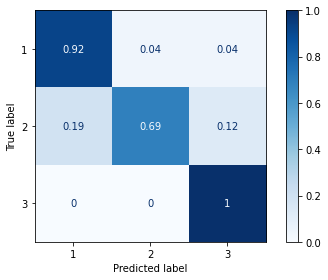

In [20]:
from sklearn.metrics import plot_confusion_matrix
matrix = plot_confusion_matrix(rfc_model, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
# plt.title('Confusion Matrix')
# plt.show(matrix)
# plt.show()

plt.tight_layout()
plt.savefig("Matrix_TRAD_RF_GridSearch.pdf", dpi=120, format='pdf')